In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

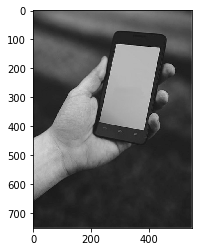

In [2]:
image = cv2.imread('images/phone.jpg')

#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap="gray")

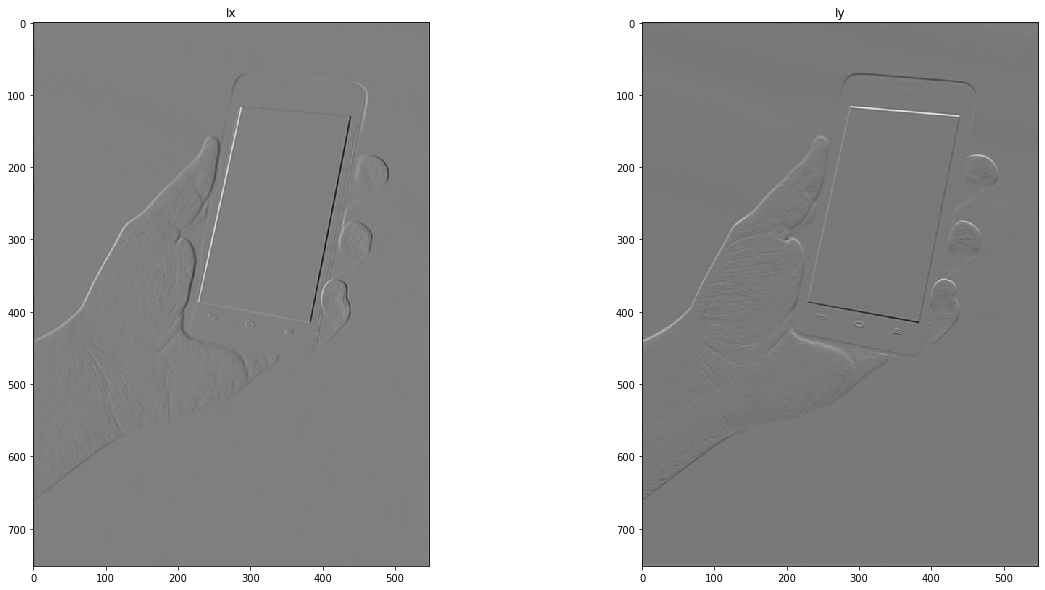

In [3]:
# 3x3 sobel filters for edge detection
"""
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

"""
# Filter the orginal and blurred grayscale images using filter2D

#gray_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

dx = cv2.Sobel(gray_img, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0)
dy = cv2.Sobel(gray_img, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0)
#dx = cv2.filter2D(gray_img, cv2.CV_32F, sobel_x)  
#dy = cv2.filter2D(gray_img, cv2.CV_32F, sobel_y)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Ix')
ax1.imshow(dx, cmap='gray')

ax2.set_title('Iy')
ax2.imshow(dy, cmap='gray')

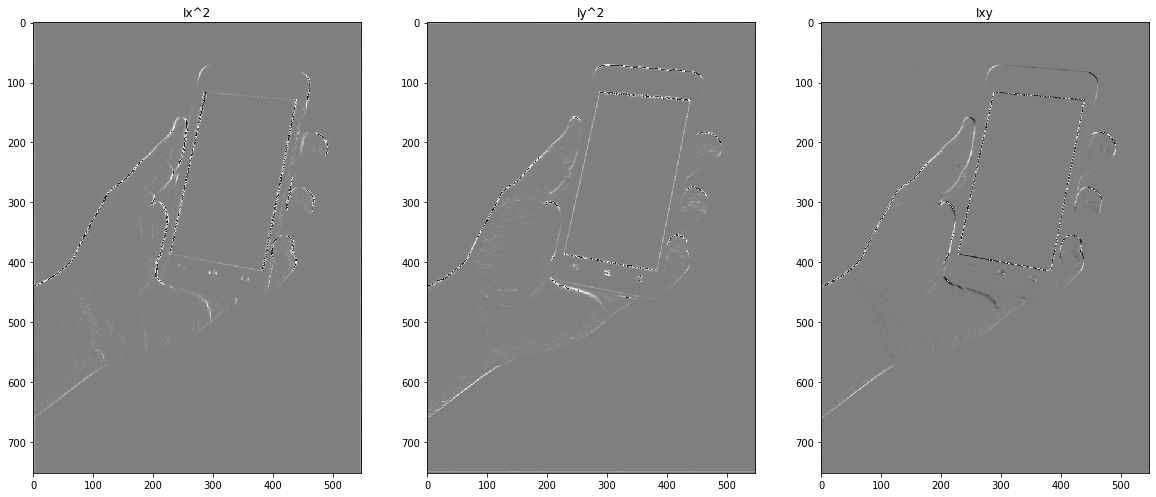

In [5]:
#Compute products of derivatives at every pixel

Ix2 = dx*dx
Iy2 = dy*dy
Ixy = dx*dy

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Ix^2')
ax1.imshow(Ix2, cmap='gray')

ax2.set_title('Iy^2')
ax2.imshow(Iy2, cmap='gray')

ax3.set_title('Ixy')
ax3.imshow(Ixy, cmap='gray')


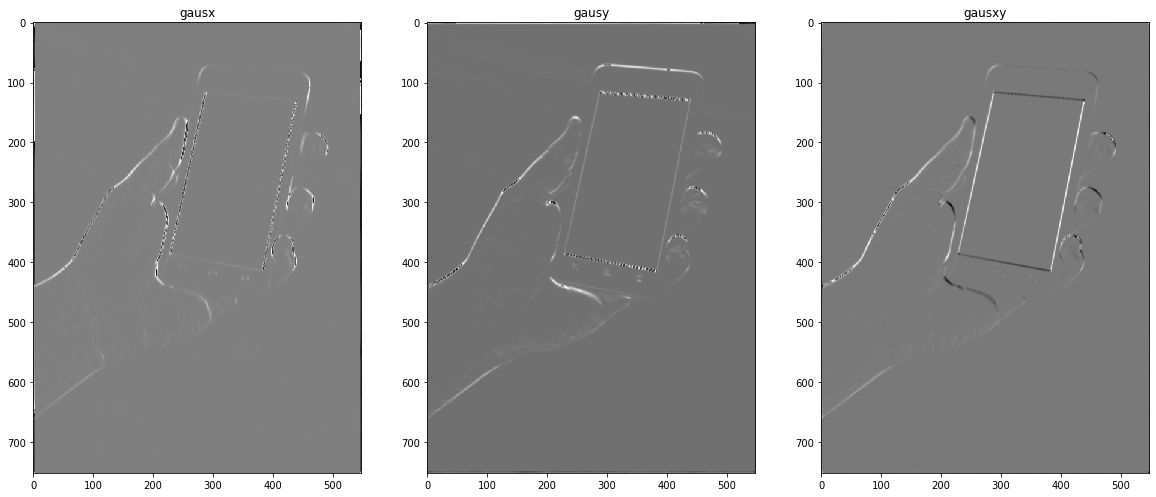

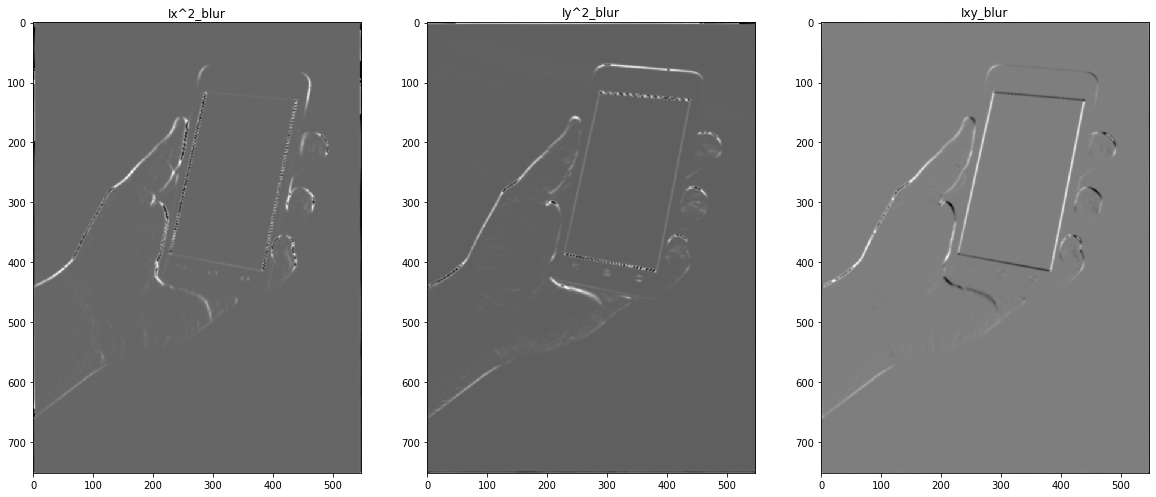

In [12]:
#Compute sums of procucts of derivatives at each pixel

#Gen kernel
kernel =cv2.getGaussianKernel(5,1)

#Apply kernel to each image
gausx2 = cv2.filter2D(Ix2,-1,kernel)
gausy2 = cv2.filter2D(Iy2,-1,kernel)
gausxy = cv2.filter2D(Ixy,-1,kernel)


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('gausx')
ax1.imshow(gausx, cmap='gray')

ax2.set_title('gausy')
ax2.imshow(gausy, cmap='gray')

ax3.set_title('gausxy')
ax3.imshow(gausxy, cmap='gray')


#Different method of sum of products
Ix2_blur = cv2.GaussianBlur(Ix2, (5,5), 0)
Iy2_blur = cv2.GaussianBlur(Iy2, (5,5), 0)
Ixy_blur = cv2.GaussianBlur(Ixy, (5,5), 0)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Ix^2_blur')
ax1.imshow(Ix2_blur, cmap='gray')

ax2.set_title('Iy^2_blur')
ax2.imshow(Iy2_blur, cmap='gray')

ax3.set_title('Ixy_blur')
ax3.imshow(Ixy_blur, cmap='gray')

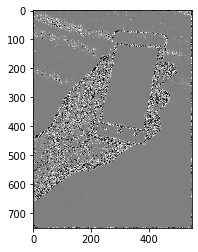

In [10]:
#Compute response of detector at each pixel
#R = det(M) - k(trace(M))^2
Wdet = Ix2 * Iy2
Wtr = (Ix2 + Iy2)**2

R = Wdet - 0.05*Wtr

plt.imshow(R, cmap='gray')




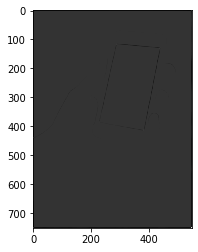

In [6]:
trace = (Ix2_blur + Iy2_blur) * (Ix2_blur + Iy2_blur)

output = (Ix2_blur*Iy2_blur) - (Ixy_blur * Ixy_blur) - 0.04*trace

plt.imshow(output, cmap='gray')